In [101]:
import pytesseract
print(pytesseract.__version__) 

0.3.10


In [102]:
import cv2
print(cv2.__version__)

4.6.0


In [103]:
import matplotlib.pyplot as plt
import numpy as np

In [104]:
#Redirecting the tesseract file Path for use the Define Libraries
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\ACER\AppData\Local\Tesseract-OCR\tesseract.exe'

In [105]:
#Image Reading
img = cv2.imread('C:\\Users\\ACER\\Desktop\\CG Assignments\\Testcases\\poster.jpg') 

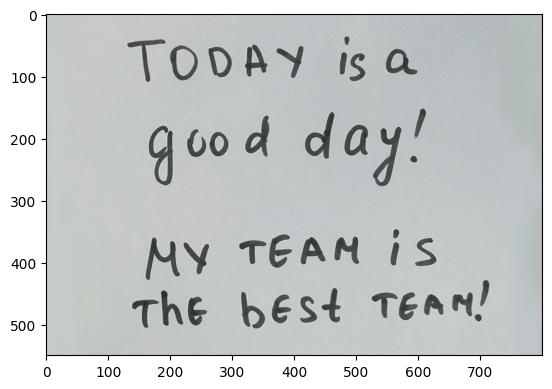

In [106]:
plt.imshow(img)

In [107]:
#Show Casing the image dimention
img.shape

(550, 800, 3)

In [108]:
#Parameters to find the Dimention of the Images
imgH, imgW,_ = img.shape

In [109]:
# Identify the Characters using Image Boxes

In [110]:
#Creating boxes in the image to identify text 
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img2 = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('Boxes for characters for the given image', img2)
cv2.waitKey(0)

image_charpre=pytesseract.image_to_string(img2)
print(image_charpre)

TIOOBN ts @
cod day!

mE AN
The best Tear!



In [111]:
# using OpenCV functions perprocess the images before using tesseract

#preprocessing Function list

# get grayscale in Given Image
def get_grayscale(image):                    
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

# noise removal in Given Image
def remove_noise(image):
    return cv2.medianBlur(image,5) 
 
#thresholding in Given Image
def thresholding(image):
    return cv2.threshold(image, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#canny edge detection in Given Image
def canny(image):
    return cv2.Canny(image, 100, 200)

#dilation in Given Image
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion in Given Image
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


In [112]:
# imgbox=pytesseract.image_to_boxes(gray)
# print(imgbox)

In [113]:
#Run the Filter Functions 1st and then Run this Segment
#Using the Filterring Options and Noice Reduction to Identify the texts Clearly
image3 = cv2.imread('C:\\Users\\ACER\\Desktop\\CG Assignments\\Testcases\\poster.jpg')



gray = get_grayscale(image3) 
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray) 


#Converting image Matrix into Text Format

image_char=pytesseract.image_to_string(gray)
print(image_char)

image_char2=pytesseract.image_to_string(thresh)
print(image_char2)

image_char3=pytesseract.image_to_string(canny)
print(image_char3)

image_char4=pytesseract.image_to_string(opening)
print(image_char4)

TODAY is Qa
qood day!

MY TEAN TS
The best TERN!

TODAY t§Q
quod day!

MY TEAM IS
The best TEan!

TODBY wea
G00 day!

My TEAM IS
ThE bESs TEan!

TODAY is Qa
qvod day!

MY TEAM IS
The best Tear!



In [114]:
h, w = gray.shape
boxes = pytesseract.image_to_boxes(gray) 
for b in boxes.splitlines():
    b = b.split(' ')
    img2 = cv2.rectangle(gray, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

print(boxes)

T 131 441 193 509 0
O 200 443 245 499 0
D 262 448 300 497 0
A 321 449 357 501 0
Y 372 442 599 514 0
i 456 434 498 518 0
s 498 434 533 518 0
Q 554 434 575 518 0
a 575 434 603 518 0
q 166 274 205 370 0
o 228 319 258 364 0
o 264 320 294 360 0
d 321 320 360 386 0
d 418 317 465 392 0
a 481 322 519 371 0
y 527 272 573 368 0
! 588 311 613 398 0
M 161 121 216 190 0
Y 222 130 263 181 0
T 312 147 355 185 0
E 360 141 397 195 0
A 411 146 451 190 0
N 465 147 505 191 0
T 556 145 570 203 0
S 595 143 630 189 0
T 139 44 182 89 0
h 185 47 221 104 0
e 229 47 260 94 0
b 315 43 353 102 0
e 364 51 396 98 0
s 410 52 437 95 0
t 444 53 475 108 0
T 525 60 567 101 0
E 569 56 600 101 0
R 610 65 641 98 0
N 655 63 688 101 0
! 691 54 715 121 0



In [115]:
# get grayscale in Given Image
def get_grayscale(image):                    
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #This Function in OpenCV2 Provides to get GrayScale 

# noise removal in Given Image
def remove_noise(image):
    return cv2.medianBlur(image,5) #Removing Noice in the Picture is Way more Important 
 
#thresholding in Given Image
def thresholding(image):
    return cv2.threshold(image, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#canny edge detection in Given Image
def canny(image):
    return cv2.Canny(image, 100, 200)

#dilation in Given Image
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion in Given Image
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

In [116]:
#Run the Filter Functions 1st and then Run this Segment
#Using the Filterring Options and Noice Reduction to Identify the texts Clearly
image4 = cv2.imread('C:\\Users\\ACER\\Desktop\\CG Assignments\\Testcases\\simplepara.jpg')

gray2 = get_grayscale(image4)
thresh = thresholding(gray2) 
opening = opening(gray2)
canny = canny(gray2) 



#Converting image Matrix into Text Format

image_char=pytesseract.image_to_string(gray2)
print(image_char)

image_char2=pytesseract.image_to_string(thresh)
print(image_char2)

image_char3=pytesseract.image_to_string(canny)
print(image_char3)

image_char4=pytesseract.image_to_string(opening)
print(image_char4)

Once upon atime, there lived three friends
ina village. They were very poor. They decided.
ogo to city to earn money. When they were
walking through the forest, they found a bag
_of money. They decided. to divide the money

Once upon a time, there lived three. friends.
In a village. They were very poor. They decided
ta go. to city to earn money. When they were
walking through the forest, they found a hag
_of._money... They decided. to divide. the. money

__Once_uvpen_o_time,. there_lived_Hacee frends
hoo. village. They_were very peac.Tley decided.
ta _go_te_ciy_to_eau_masey._lhen_bney_wene.
igiaikiag_Harongla_the forest... tney—foumed.o. [sag
of manay.—Tlrey_decicled _ba_divice Uhe_money.


Once_upon a time, there lived three friends
n_a_rillage. Theg were very peor. They chectded.
bo ge bo city to earn money. Wiken beey were
walking Hemugh the forest, they found a bag
_of money. They daecicled. bo _drvice. tae money



In [117]:
cv2.imshow('Filltered Image', thresh)
cv2.waitKey(0)

-1

In [118]:
#Language configuration can be done and the numbers lisiting

In [119]:
#Represent the Digits in the Image

# print("Digits in the Image Respectively:-")
# digit_list = r'--oem 3 --psm 6 outputbase digits'
# conimage= pytesseract.image_to_string(image3, config=digit_list)
# print(conimage)

In [120]:
#Addressing the realted text library in Terreract
#language_Config = r'-l sin --psm 6' 

In [121]:
gray.shape

(550, 800)

In [122]:
h, w = gray2.shape
boxes = pytesseract.image_to_boxes(gray2) 
for b in boxes.splitlines():
    b = b.split(' ')
    img2 = cv2.rectangle(gray2, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

print(boxes)

O 44 189 58 208 0
n 61 188 72 202 0
c 75 188 87 202 0
e 89 188 100 202 0
u 119 180 130 202 0
p 119 180 145 201 0
o 149 189 159 202 0
n 163 189 174 202 0
a 190 188 203 202 0
t 220 189 229 209 0
i 232 189 235 205 0
m 238 189 256 203 0
e 255 187 266 209 0
, 259 187 281 203 0
t 303 190 312 212 0
h 313 190 324 212 0
e 326 190 336 203 0
r 333 190 345 212 0
e 337 190 355 203 0
l 373 190 377 209 0
i 380 190 384 205 0
v 387 190 397 203 0
e 398 190 409 202 0
d 411 190 422 211 0
t 442 191 449 212 0
h 442 191 462 212 0
r 464 192 474 204 0
e 474 191 484 204 0
e 486 191 501 204 0
f 519 191 524 215 0
r 519 191 537 213 0
i 538 192 543 208 0
e 545 192 565 205 0
n 556 191 567 215 0
d 566 192 577 215 0
s 578 192 599 206 0
i 0 145 11 164 0
n 12 145 29 159 0
a 46 145 67 159 0
v 87 137 91 166 0
i 87 145 104 162 0
l 109 146 112 165 0
l 116 146 119 166 0
a 123 146 135 160 0
g 138 137 150 160 0
e 152 146 162 160 0
. 169 146 172 150 0
T 190 145 219 169 0
h 206 137 221 169 0
e 221 146 232 159 0
y 233 137 244 159

In [123]:
cv2.imshow('Boxes for characters for the given filtered image', gray2)
cv2.waitKey(0)


-1